In [4]:
import numpy as np
import os
from PIL import Image
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
dir_one = '/home/alex/poker/1/'
dir_two = '/home/alex/poker/2/'
dir_three = '/home/alex/poker/fwd/'

In [11]:
def file_list(some_dir):
    return [i for i in sorted(os.listdir(some_dir))]    

In [13]:
first = file_list(dir_one)
second = file_list(dir_two)
third = file_list(dir_three)

In [6]:
def got_rgb_list(array):
    r = []
    for i in array:
        for b in i:
            r+= [b[0]]
    g = []
    for i in array:
        for b in i:
            g+= [b[1]]  
    b = []
    for i in array:
        for num in i:
            b+= [num[2]]
            
    df = pd.DataFrame({'r': r,'b': b, 'g': g}, )
    
    red_list = list(df.r.unique())
    green_list = list(df.g.unique())
    blue_list = list(df.b.unique())    
    
    return red_list, green_list, blue_list

In [7]:
def two_d(size, rgb_list):
    test = []
    for i in range (size):
        test += [[random.choice(rgb_list[0]), random.choice(rgb_list[1]), random.choice(rgb_list[2])]]
    return test

In [120]:
def random_3d(a,b, rgb_list):
    res = []
    for i in range (a):
        res += [two_d(b,rgb_list)]
    res = np.asarray(res)  
    res = np.uint8(res)
    return res

In [ ]:
# dir one

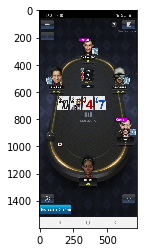

In [37]:
im = Image.open(dir_one+first[0])
plt.imshow(im)


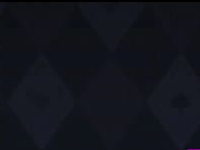

In [54]:
first_background = im.crop((110,60,310,210))
first_background

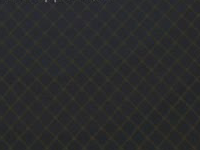

In [71]:
first_table = im.crop((310,820,510,970))
first_table

In [ ]:
# dir_two

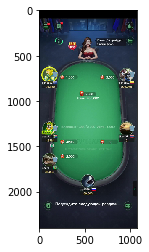

In [36]:
img = (Image.open(dir_two+second[2]))
np.asarray(img).shape
plt.imshow(img)

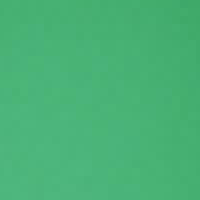

In [35]:
second_table = img.crop((500,1000,700,1200))
second_table

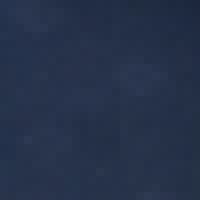

In [16]:
second_background = (img).crop((800,400,1000,600))
second_background

In [ ]:
## dir_three

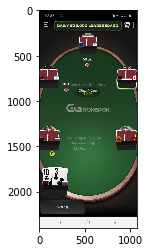

In [73]:
img = (Image.open(dir_three+third[2]))
plt.imshow(img)

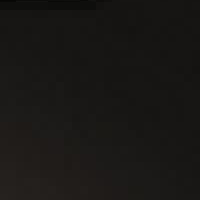

In [74]:
third_background = img.crop((800,230,1000,430))
third_background

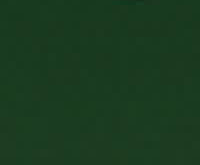

In [89]:
third_table = img.crop((400,635,600,800))
third_table

In [ ]:
# filnal rgb list from three backgrounds and three tables

In [95]:
def one_dim(picture, num):
    return got_rgb_list(np.asarray(picture))[num]

In [112]:
final_rgb = \
[one_dim(first_table,0)+one_dim(second_table,0)+one_dim(third_table,0)
 +one_dim(first_background,0)+one_dim(second_background,0)+one_dim(third_background,0)] +\
[one_dim(first_table,1)+one_dim(second_table,1)+one_dim(third_table,1)
 +one_dim(first_background,1)+one_dim(second_background,1)+one_dim(third_background,1)] +\
[one_dim(first_table,2)+one_dim(second_table,2)+one_dim(third_table,2)
 +one_dim(first_background,2)+one_dim(second_background,2)+one_dim(third_background,2)] 

In [110]:
def got_unique(some_list):       
    return list(set(some_list))

In [113]:
final_rgb = [got_unique(final_rgb[0]), got_unique(final_rgb[1]), got_unique(final_rgb[2])]

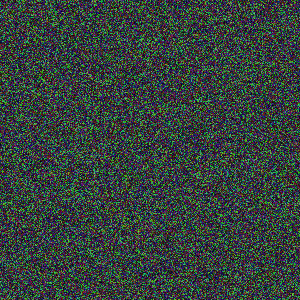

In [501]:
Image.fromarray(random_3d(300,300,final_rgb))

 ## Generator - possible coordinate area

In [ ]:
# 5 *5

In [162]:
random.choice(([[1,2],[2,3]]))

[2, 3]

In [165]:
coordinate = []
for i in range (6):
    for j in range(6):
        coordinate += [[i,j]]
print (coordinate)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5]]


In [167]:
coordinate = [[i,j] for i in range(6) for j in range(6)]
print (coordinate)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5]]


## Generator - create figures on np.zeros

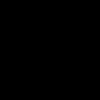

In [183]:
zero_area = (np.zeros((100,100,3), dtype = "uint8"))
Image.fromarray(zero_area)

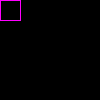

In [184]:
start_point = (0, 0) 
end_point = (20, 20) 
color = (255, 0, 255)
thickness = 1
res = cv2.rectangle(zero_area, start_point, end_point, color, thickness) 
Image.fromarray(res)

## how change possible coordinate area?

In [188]:
def get_coordinate(x1,x2,y1,y2):
    return [[i,j] for i in range(x1,x2) for j in range(y1,y2)]

In [190]:
print (get_coordinate(0,20,0,20))

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 16], [2, 17], [2, 18], [2, 19], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 16], [4, 17], [4, 18], [4, 19], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [5, 15], [5, 16], [5, 17

In [194]:
def delta(first,second):
    return [i for i in first if i not in second]    

In [502]:
a = [[1,1],[1,2],[1,3]]
b = [[1,1],[1,5]]
delta(b,a), delta(a,b)

([[1, 5]], [[1, 2], [1, 3]])

## create random rect in possible area

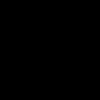

In [198]:
zero_area = (np.zeros((100,100,3), dtype = "uint8"))
Image.fromarray(zero_area)

In [200]:
possible_area = get_coordinate(0,100,0,100)
len (possible_area)

10000

good_choice


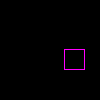

In [419]:
zero_area = (np.zeros((100,100,3), dtype = "uint8"))

for i in range(10):  
    choice = random.choice(possible_area)
    start_point = (choice[0],choice[1])
    size = 20
    end_point = (choice[0]+size, choice[1]+size)
    if list(end_point) in possible_area:
        print ("good_choice")        
        color = (255, 0, 255) 
        thickness = 1
        res = cv2.rectangle(zero_area, start_point, end_point, color, thickness) 
        break
    else:
        print (end_point, "is bad_choice")
        continue
Image.fromarray(res)  




(68, 119) is bad_choice
(44, 103) is bad_choice
(107, 25) is bad_choice
(103, 35) is bad_choice
(60, 57) is bad_choice
(116, 48) is bad_choice
(37, 113) is bad_choice
(24, 54) is bad_choice
(100, 96) is bad_choice
(65, 59) is bad_choice
(107, 26) is bad_choice


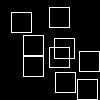

In [564]:
zero_area = (np.zeros((100,100,3), dtype = "uint8"))
possible_area = get_coordinate(0,100,0,100)
res = zero_area
for i in range(20):  
    choice = random.choice(possible_area)
    start_point = (choice[0],choice[1])
    size = 20
    end_point = (choice[0]+size, choice[1]+size)

    if list(end_point) in possible_area:
        #print ("good_choice")        
        color = (255, 255, 255) 
        thickness = 1
        res = cv2.rectangle(res, start_point, end_point, color, thickness)         
        rect_area = get_coordinate(start_point[0],end_point[0],start_point[1],end_point[1])  
        possible_area = delta(possible_area,rect_area)        
        continue
    else:
        print (end_point, "is bad_choice")
        continue
Image.fromarray(res)  

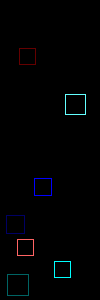

In [534]:
zero_area = (np.zeros((300,100,3), dtype = "uint8"))
possible_area = get_coordinate(0,100,0,300)
possible_color = [0,255,100]
res = zero_area
max_number_of_element = 8
counter = 0

for i in range(20):  
    choice = random.choice(possible_area)
    start_point = (choice[0],choice[1])
    size = 15+random.choice([1,2,3,4,5,6,7,8,9,10])
    end_point = (choice[0]+size, choice[1]+size)
    # create rect area
    # create delta 
    # condition is if len(delta) ==  0
    range_between = 5
    rect_area = get_coordinate(start_point[0],end_point[0]+range_between,
                               start_point[1],end_point[1]+range_between)
    this_delta = delta(rect_area, possible_area)    
    if len(this_delta) == 0:    
        #print (end_point, "is good_choice")
        color = (random.choice(possible_color), random.choice(possible_color), random.choice(possible_color)) 
        thickness = 1
        res = cv2.rectangle(res, start_point, end_point, color, thickness) 
        
        possible_area = delta(possible_area,rect_area)
        #print (len(possible_area))  
        counter += 1
        if counter == max_number_of_element:
            break
        else:
            continue        
    else:
        #print (end_point, "is bad_choice")
        continue
Image.fromarray(res)  

In [559]:
def field_with_random_rect(x,y):
    zero_area = (np.zeros((x,y,3), dtype = "uint8"))
    possible_area = get_coordinate(0,y,0,x)
    possible_color = [0,255,100]
    possible_size = [1,2,3,4,5,6,7,8,9,10]
    res = zero_area
    max_number_of_element = 8
    counter = 0
    cicles = 30
    fill = [1,-1]
    for i in range(cicles):  
        choice = random.choice(possible_area)
        start_point = (choice[0],choice[1])
        size = 15+random.choice(possible_size)
        end_point = (choice[0]+size, choice[1]+size)
        range_between = 5
        rect_area = get_coordinate(start_point[0] - range_between,end_point[0]+range_between,
                                   start_point[1] - range_between,end_point[1]+range_between)
        this_delta = delta(rect_area, possible_area)    
        if len(this_delta) == 0:               
            color = (random.choice(possible_color), random.choice(possible_color), random.choice(possible_color)) 
            thickness = random.choice(fill)
            res = cv2.rectangle(res, start_point, end_point, color, thickness) 
            possible_area = delta(possible_area,rect_area)
            counter += 1
            if counter == max_number_of_element:
                break
            else:
                continue        
        else:
            continue
    return Image.fromarray(res) 

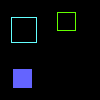

In [555]:
field_with_random_rect(100,100)

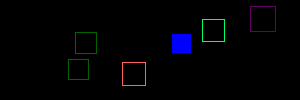

In [556]:
field_with_random_rect(100,300)

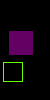

In [557]:
field_with_random_rect(100,50)

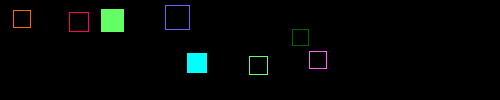

In [560]:
field_with_random_rect(100,500)

## Create random circle in possible area

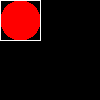

In [591]:
zero_area = (np.zeros((100,100,3), dtype = "uint8"))
center_coordinates = (20, 20)
radius = 40//2
start_point = (0, 0) 
end_point = (40, 40) 
  


color = (255, 0, 0)
thickness = -1
res = cv2.circle(zero_area, center_coordinates, radius, color, thickness)
res = cv2.rectangle(res, start_point, end_point, (255,255,255), 1) 

Image.fromarray(res)

## rect and circle in one def

In [ ]:
def get_coordinate(x1,x2,y1,y2):
    return [[i,j] for i in range(x1,x2) for j in range(y1,y2)]

In [623]:
def get_center(x2,y2,length):
    return ((x2)-length, (y2)-length)

In [652]:
def random_figures(x,y, base_size = 20, cicles = 30, max_number_of_element = 8):    
    zero_area = (np.zeros((x,y,3), dtype = "uint8"))
    possible_area = get_coordinate(0,y,0,x)
    possible_color = [0,255,100]
    res = zero_area    
    counter = 0
    possible_size = [1,2,3,4,5,6,7,8,9,10]
    possible_fill = [1,-1]  
    for i in range(cicles):  
        choice = random.choice(possible_area)
        start_point = (choice[0],choice[1])
        size = base_size+random.choice(possible_size)
        end_point = (choice[0]+size, choice[1]+size)
        range_between = 6
        center = (get_center(end_point[0],end_point[1],size//2))
        rect_area = get_coordinate(start_point[0]-range_between,end_point[0]+range_between,
                                   start_point[1]-range_between,end_point[1]+range_between)
        figure_type = [1,0]
        this_delta = delta(rect_area, possible_area)   
        ## change this???
        if len(this_delta) == 0:      
            color = (random.choice(possible_color), random.choice(possible_color), random.choice(possible_color)) 
            thickness = random.choice(possible_fill)
            # print (end_point,center)
            radius = size//2        
            if random.choice(figure_type) == 0:
                res = cv2.rectangle(res, start_point, end_point, color, thickness)   
            else:
                res = cv2.circle(res, center, radius, color, thickness)        
            possible_area = delta(possible_area,rect_area)        
            counter += 1
            if counter == max_number_of_element:
                break
            else:
                continue        
        else:
            continue
    return Image.fromarray(res)  

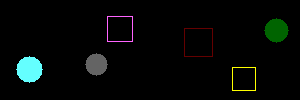

In [633]:
random_figures(100,300)

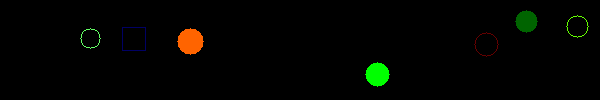

In [634]:
random_figures(100,600)

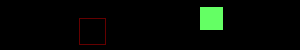

In [637]:
random_figures(50,300)

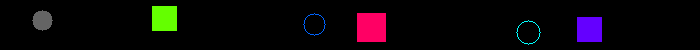

In [638]:
random_figures(50,700)

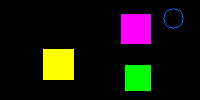

In [639]:
random_figures(100,200)

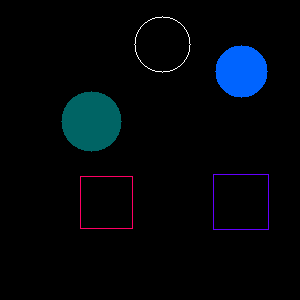

In [654]:
random_figures(300,300, base_## rect and circle in one defsize = 50, cicles = 20)